In [1]:
from google.colab import drive
drive.mount('/content/drive')
#drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers, regularizers
from keras.applications import *   
# Import OpenCV
import cv2
import time
# Utility
import os
import numpy as np
import itertools
import random
from collections import Counter
from glob import iglob
    
# Ignore warning
import warnings
warnings.filterwarnings('ignore')
#sk.model_selection.KFold
# Confusion Matrix & classification report
from sklearn.metrics import confusion_matrix, classification_report
import sklearn as sk
# Plot
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline

Using TensorFlow backend.


In [0]:
BASE_DATASET_FOLDER = os.path.join(r"/content/drive","My Drive","Dataset")
TRAIN_FOLDER = "Train" #"train"
VALIDATION_FOLDER = "Validation"#"validation"
TEST_FOLDER = "Test"#"test"
    
# ResNet50 image size
IMAGE_SIZE = (224, 224)
INPUT_SHAPE = (224, 224, 3)

# Keras settings
TRAIN_BATCH_SIZE = 64
VAL_BATCH_SIZE = 10
EPOCHS = 120
LEARNING_RATE = 0.0001

In [0]:
MODEL_PATH = os.path.join("net11.h5")

In [0]:
def percentage_value(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return"{:.1f}%\n({:d})".format(pct, absolute)
    
def plot_dataset_description(path, title): 
    classes = []
    for filename in iglob(os.path.join(path, "**","*.*")):
        classes.append(os.path.split(os.path.split(filename)[0])[-1])
    
    classes_cnt = Counter(classes)
    values = list(classes_cnt.values())
    labels = list(classes_cnt.keys())

    plt.figure(figsize=(6,6))
    plt.pie(values, labels=labels, autopct=lambda pct: percentage_value(pct, values),shadow=True, startangle=140)

    plt.title(title)   
    plt.show()

Found 8330 images belonging to 5 classes.


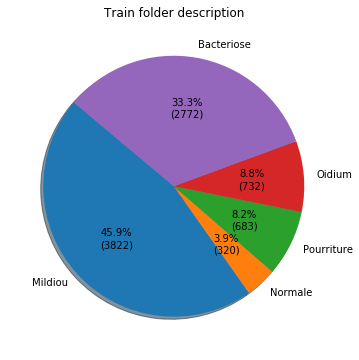

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(os.path.join(BASE_DATASET_FOLDER, TRAIN_FOLDER),target_size=IMAGE_SIZE,batch_size=TRAIN_BATCH_SIZE,class_mode='categorical',shuffle=True)
#Found 8330 images belonging to 5 classes.

plot_dataset_description(os.path.join(BASE_DATASET_FOLDER, TRAIN_FOLDER), "Train folder description")


Found 828 images belonging to 5 classes.


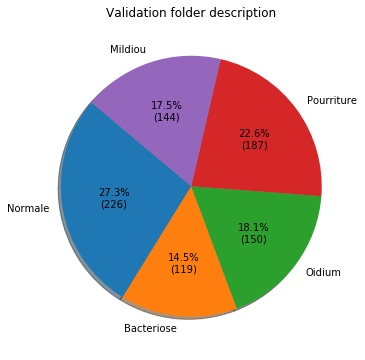

In [7]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(os.path.join(BASE_DATASET_FOLDER, VALIDATION_FOLDER),target_size=IMAGE_SIZE,class_mode='categorical',shuffle=False)
#Found 773 images belonging to 5 classes.

plot_dataset_description(os.path.join(BASE_DATASET_FOLDER, VALIDATION_FOLDER), "Validation folder description")
#Resultat


Found 1505 images belonging to 5 classes.


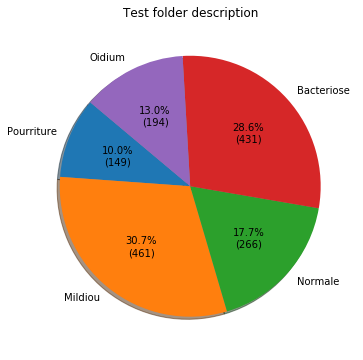

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(os.path.join(BASE_DATASET_FOLDER, TEST_FOLDER),target_size=IMAGE_SIZE,batch_size=VAL_BATCH_SIZE,class_mode='categorical',shuffle=False)
#Found 1375 images belonging to 5 classes.

plot_dataset_description(os.path.join(BASE_DATASET_FOLDER, TEST_FOLDER), "Test folder description")

In [16]:
classes = {v: k for k, v in train_generator.class_indices.items()}

print(classes)

{0: 'Bacteriose', 1: 'Mildiou', 2: 'Normale', 3: 'Oidium', 4: 'Pourriture'}


In [17]:
#Create model
model = Sequential()
model.add(Conv2D(128, kernel_size=(7, 7), activation='relu', padding='same', input_shape=INPUT_SHAPE))
model.add(Conv2D(128, (7, 7), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
# show summary of this new Model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 128)     18944     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 128)     802944    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      204864    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 64)      102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 32)       

In [19]:
%%time 
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=LEARNING_RATE),metrics=['acc'])




CPU times: user 40.3 ms, sys: 24 µs, total: 40.3 ms
Wall time: 43.6 ms


In [0]:
%%time
history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//train_generator.batch_size,epochs=EPOCHS,validation_data=val_generator,validation_steps=val_generator.samples//val_generator.batch_size)

Epoch 1/120


In [0]:
#model=load('MODEL_PATH')
model.save("net11.h5")

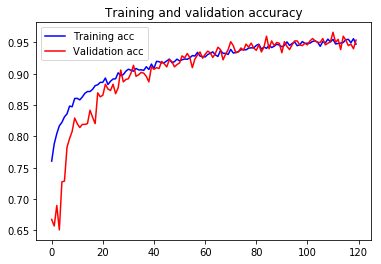

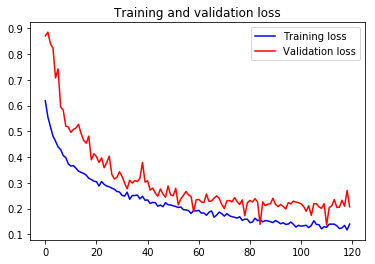

In [0]:
#Check Performance
#Plot training and validation accuracy and loss:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [0]:
def loss_plot(history):
    train_acc = history.history['acc']
    val_acc = history.history['val_acc']

    plt.figure(figsize=(9,5))
    plt.plot(np.arange(1,len(train_acc)+1),train_acc,  marker = 'D',
             label = 'Training Accuracy')
    plt.plot(np.arange(1,len(train_acc)+1),val_acc,  marker = 'o',
             label = 'Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train/Validation Accuracy')
    plt.legend()
    plt.margins(0.02)
    plt.show()

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(9,5))
    plt.plot(np.arange(1,len(train_acc)+1),train_loss, marker = 'D',
             label = 'Training Loss')
    plt.plot(np.arange(1,len(train_acc)+1),val_loss, marker = 'o',
             label = 'Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train/Validation Loss')
    plt.legend()
    plt.margins(0.02)
    plt.show()

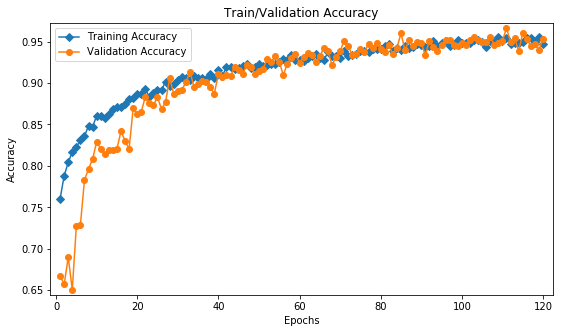

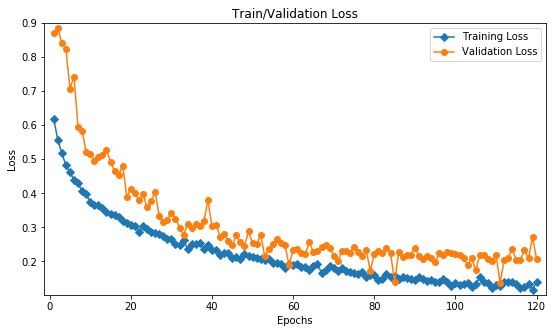

In [0]:
loss_plot(history)

In [0]:

from google.colab import files
files.upload()
#runfile("/content/drive/My Drive/Colab Notebooks/Untitled1.ipynb")

In [0]:
%%time
loss, accuracy = model.evaluate_generator(test_generator,steps=test_generator.samples//test_generator.batch_size)
#CPU times: user 984 ms, sys: 212 ms, total: 1.2 s
#Wall time: 1.37 s

CPU times: user 6.56 s, sys: 1.07 s, total: 7.63 s
Wall time: 12min 19s


In [0]:
print("Accuracy: %f\nLoss: %f" % (accuracy,loss))

Accuracy: 0.956000
Loss: 0.189050


In [0]:
%%time
Y_pred = model.predict_generator(test_generator,verbose=1, steps=test_generator.samples//test_generator.batch_size)

 37/150 [======>.......................] - ETA: 9s

In [0]:
y_pred = np.argmax(Y_pred, axis=1)


In [0]:
cnf_matrix = confusion_matrix((test_generator.classes[:len(y_pred),]), y_pred)

In [0]:
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(6,6))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=8)
    plt.yticks(tick_marks, classes, fontsize=12)
    
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label', fontsize=16)
    plt.xlabel('Predicted label', fontsize=16)

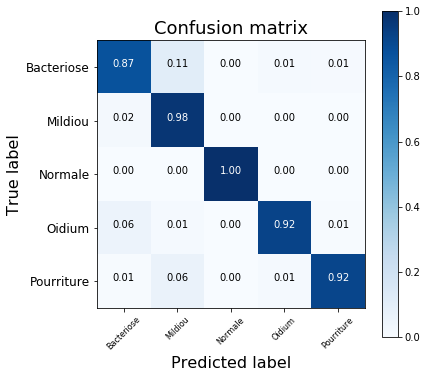

In [0]:
plot_confusion_matrix(cnf_matrix, list(classes.values()))

In [0]:
#Classification Report
#Print classification report
print(classification_report(test_generator.classes[:len(y_pred),], y_pred, target_names=list(classes.values())))

              precision    recall  f1-score   support

  Bacteriose       0.99      0.99      0.99       431
     Mildiou       0.97      1.00      0.99       462
     Normale       1.00      1.00      1.00       267
      Oidium       0.99      0.93      0.96       195
  Pourriture       0.96      0.95      0.96       145

    accuracy                           0.98      1500
   macro avg       0.98      0.97      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [0]:
def load_image(filename):
    img = cv2.imread(os.path.join(BASE_DATASET_FOLDER, TEST_FOLDER, filename))
    img = cv2.resize(img,(224,224))
    #img=np.asarray(img)
    #img = img.astype("float32")
    img = img /255
    
    return img

def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}

In [0]:
for idx, filename in enumerate(random.sample(test_generator.filenames, 10)):
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    
    img = load_image(filename)
    prediction = predict(img)
    print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()
